In [1]:
# Import required packages

import numpy as np
import pandas as pd


In [2]:
# Carregando o conjunto de dados em um quadro de dados usando Pandas

df=pd.read_csv('agricultural_raw_material.csv')

In [ ]:
# Explorando o cunjunto de dados

df.info


In [4]:
# Checking Null Values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [5]:
# Lidar com dados ausentes, incorretos e inválidos

# Replacing %, "," and "-"

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Dropping rows with NaN values
df = df.dropna()

#check to see if all NaN values are resolved
df.isnull().sum()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change", "Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [6]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [7]:
# Colunas de data e hora
# Formatando a coluna e definindo-a como índice para o conjunto de dados

df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Month')

In [8]:
df.head(10)

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,2.39,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51
1990-11-01,334.50,15.24,236.0,19.19,1.82,1.68,888.61,1.47,179.02,5.66,...,375.74,8.20,0.90,0.00,130.50,7.58,206.64,0.16,773.37,4.22
1990-12-01,328.24,1.87,237.0,0.42,1.85,1.65,870.55,2.03,171.13,4.41,...,363.16,3.35,0.88,2.22,119.35,8.54,198.22,4.07,741.29,4.15
1991-01-01,319.47,2.67,233.0,1.69,1.85,0.00,887.41,1.94,169.19,1.13,...,362.26,0.25,0.87,1.14,126.14,5.69,186.94,5.69,721.85,2.62


In [9]:
# Análise Exploratória e Visualização de dados. 
# Vamos começar importando matplotlib.pyplot e seaborn

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [10]:
%matplotlib inline 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

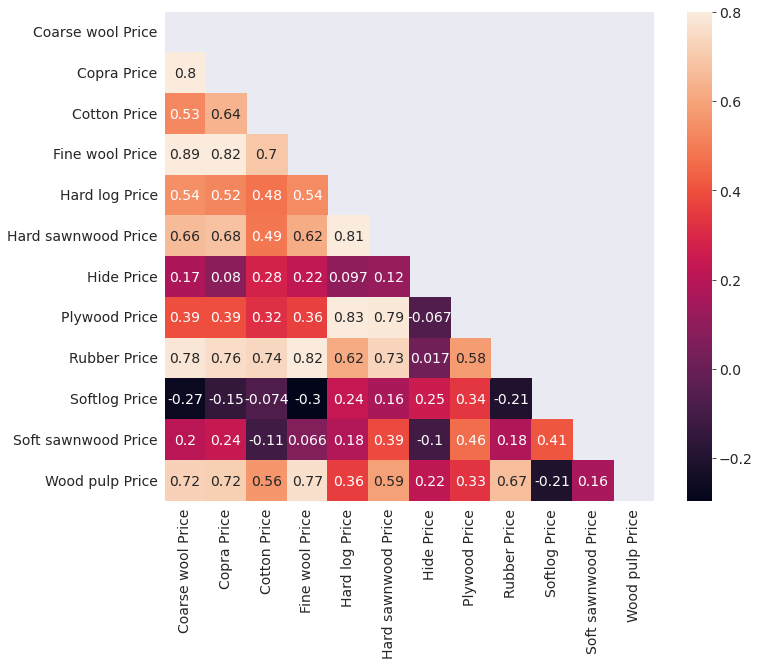

In [11]:
                                                   # mapa de calor

# raw-materials list
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
            'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']


# getting the correlation matrix
corrmat = df[raw_data].corr()

# setting the size of plot
fig = plt.figure(figsize=(12,9))

# masking the upper traingle part since matrix is symmertric(repetitive)
mask = np.triu(np.ones_like(corrmat,dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square = True, annot = True)
plt.show()



O mapa de calor mostra a correlação entre as matérias-prima, quanto maior o valor correlacionado, maior a chance de serem duas matérias-primas relacionadas, mas não necessariamente.

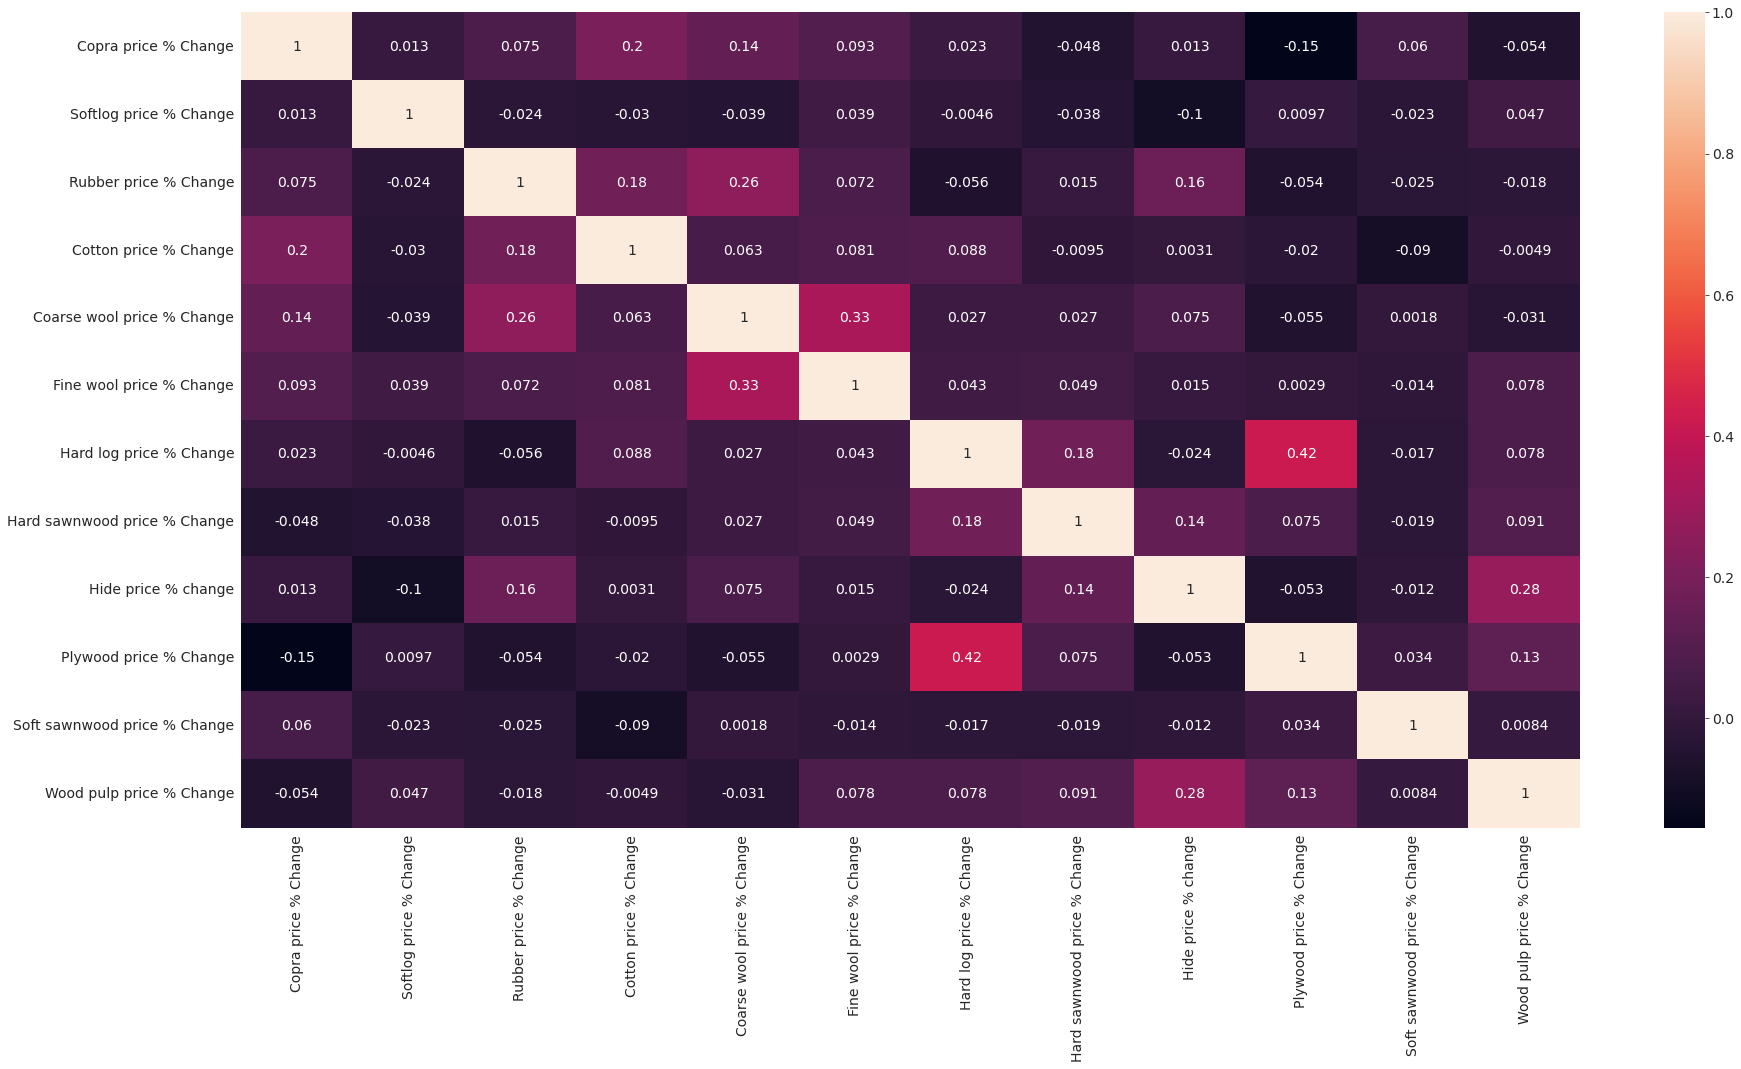

In [21]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas


*   O valor negativo implica que duas variáveis estão negativamente correlacionadas (um aumento, outro decréscimo)
*   Zero implica nenhuma relação
*   Caso contrário, quanto maior o valor, maior a chance de relação. Preços e seus gráficos de % de mudança






**Lã grossa**

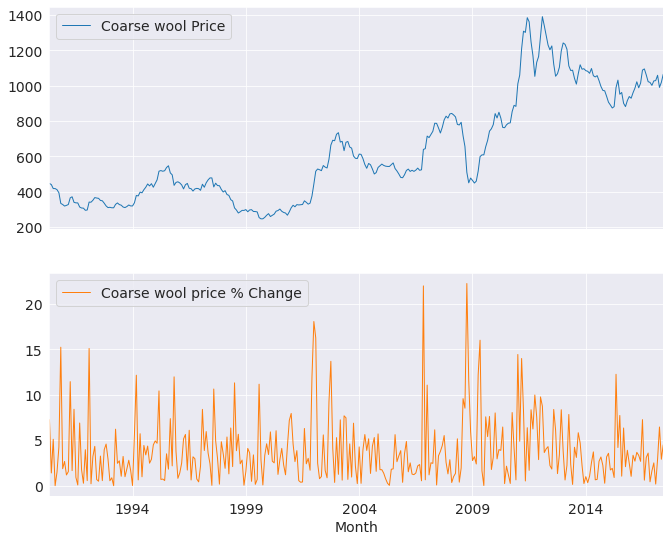

In [26]:
axes=df[['Coarse wool Price', "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

# Fazendo e respondendo perguntas

**Q1: Descubra a variação normal do preço de cada matéria-prima**

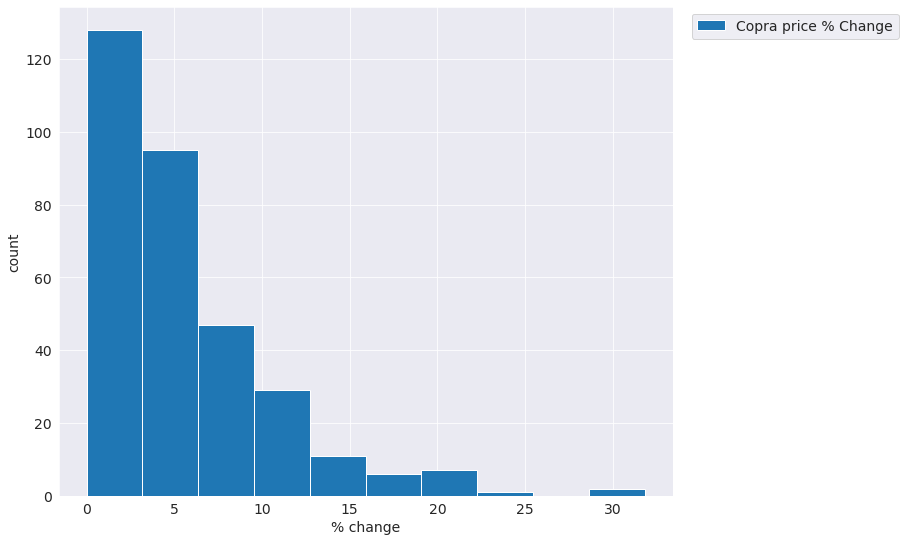

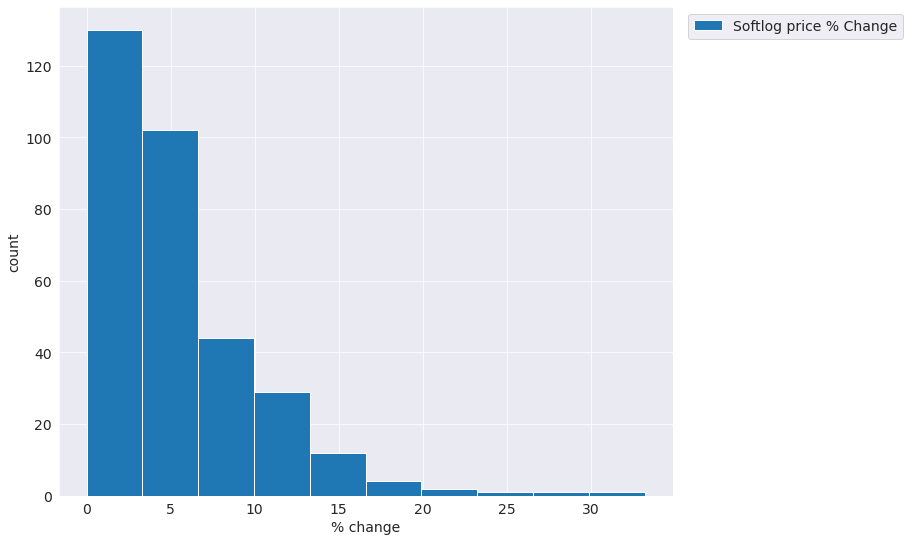

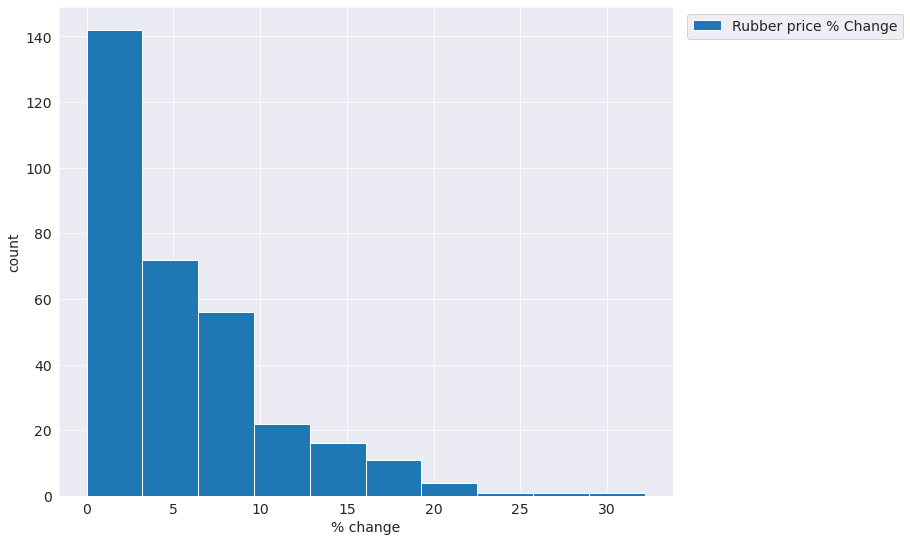

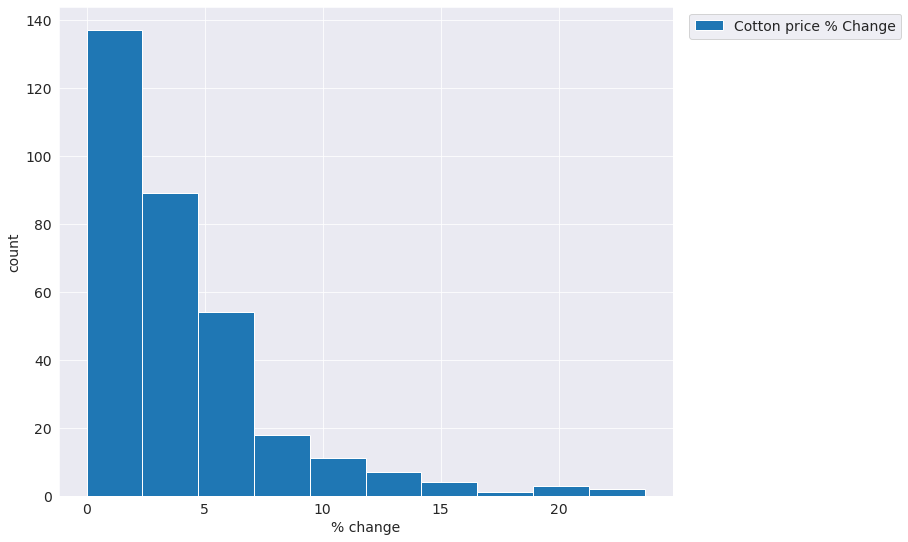

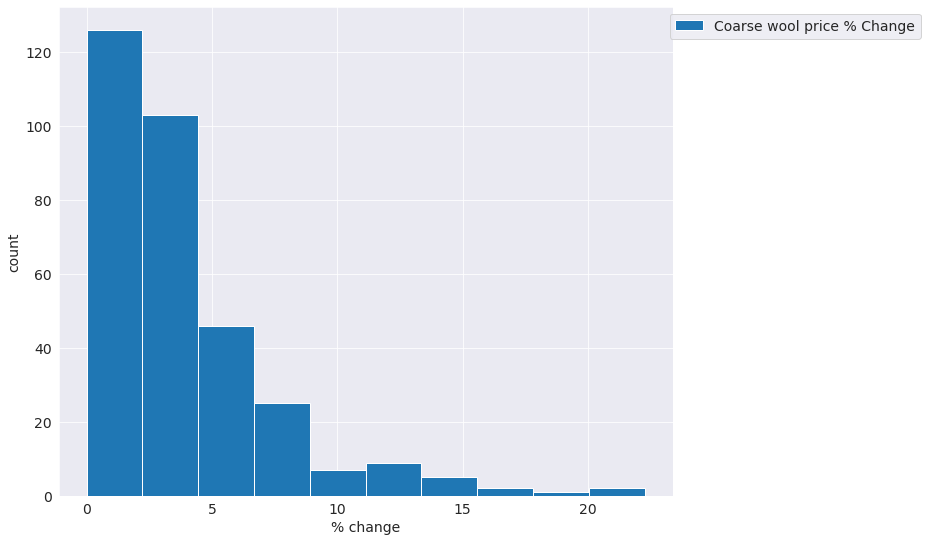

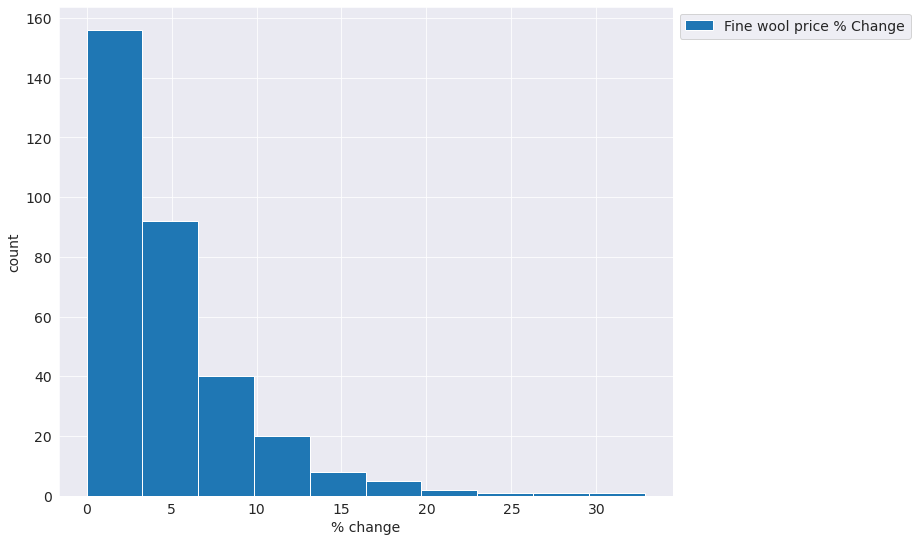

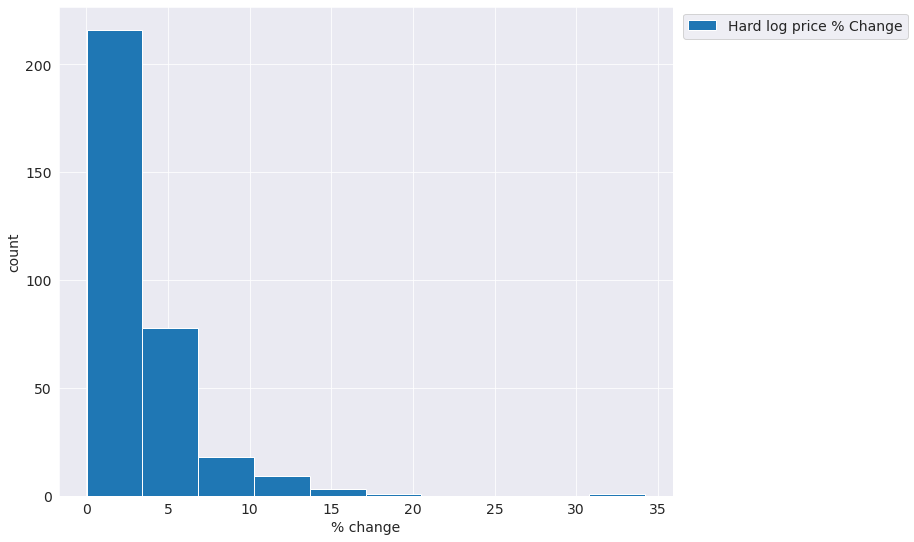

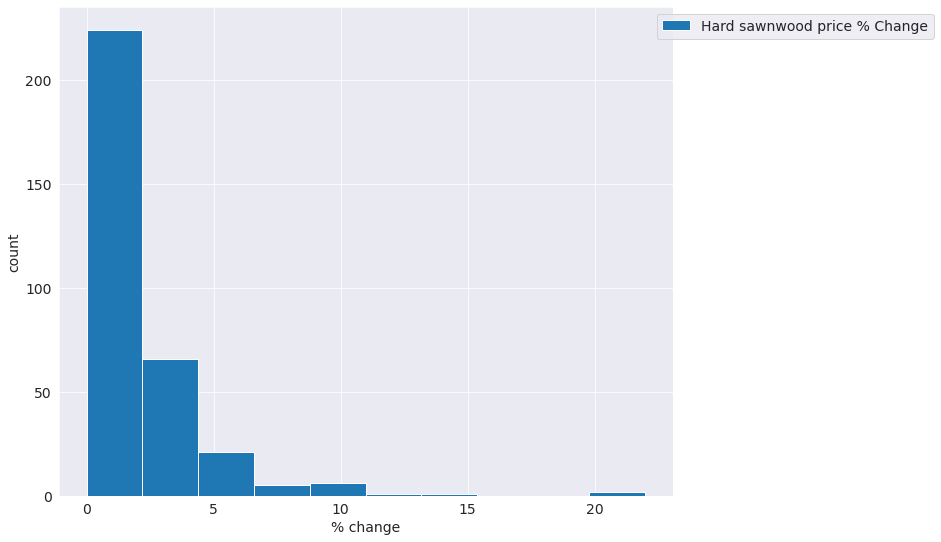

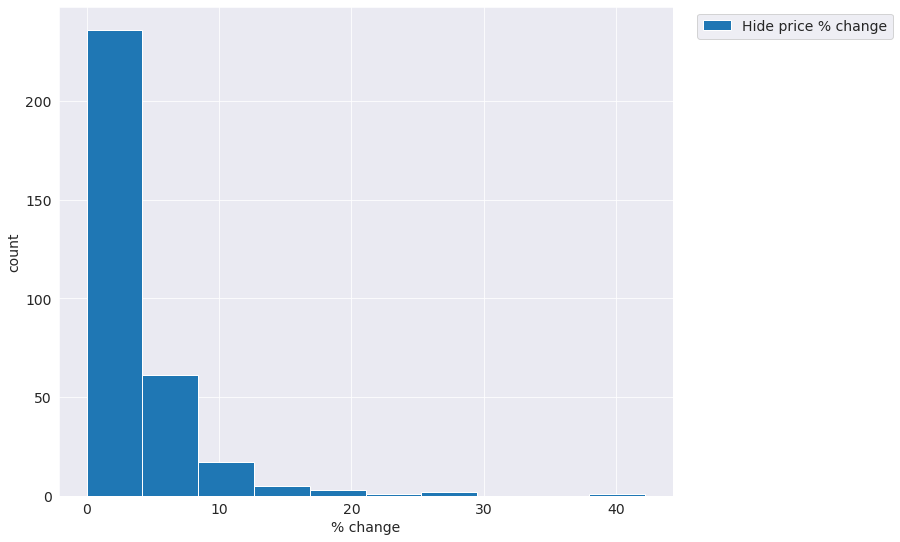

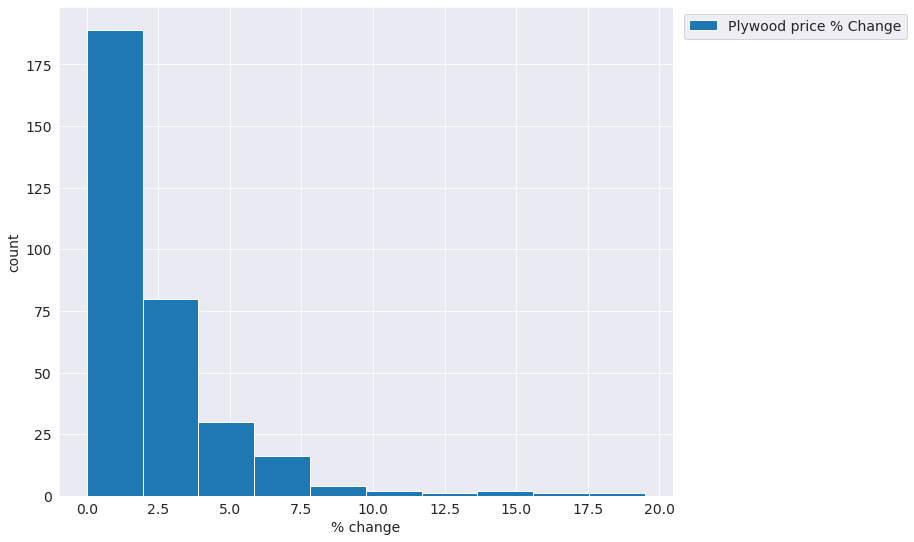

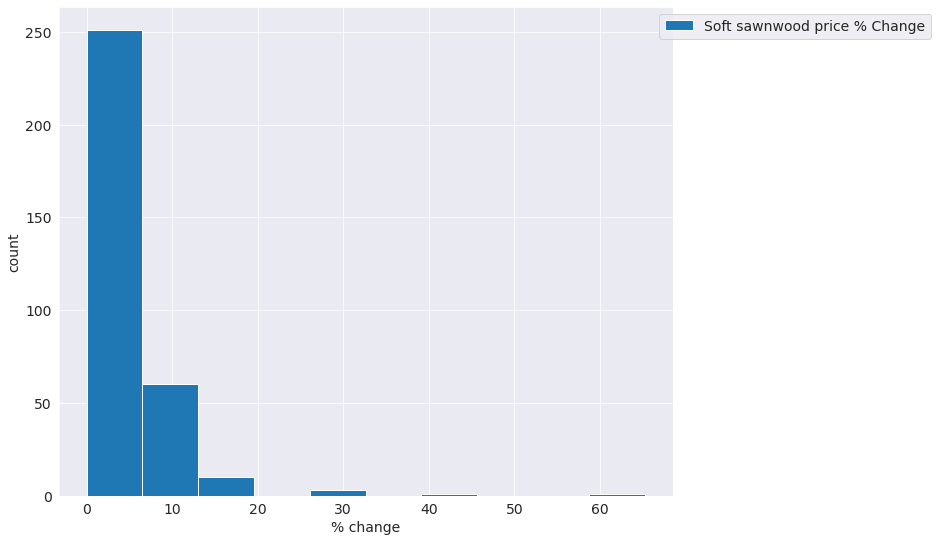

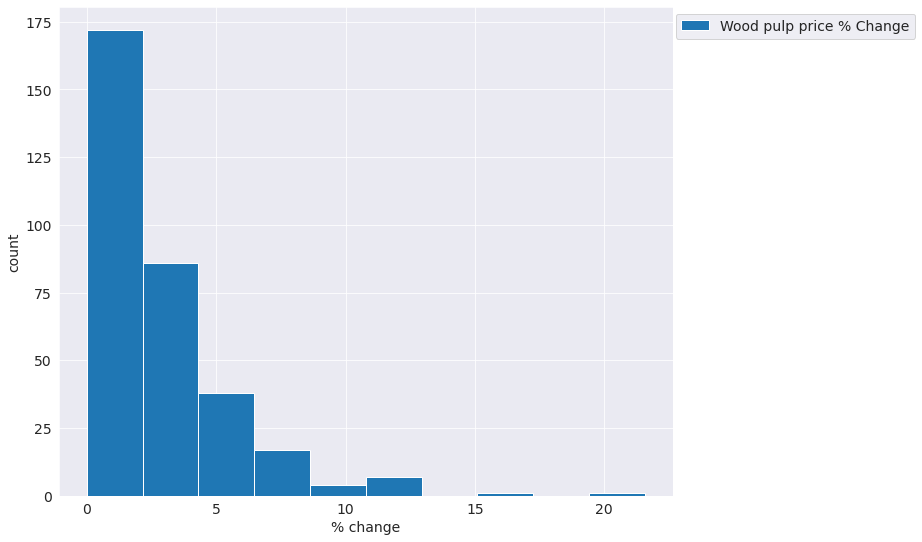

In [29]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
  plt.figure(figsize=(12, 12))
  df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
  plt.xlabel('% change')
  plt.ylabel('count')
  plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2, 1))

Podemos observar que a maioria das matérias-primas tem % de madança frequente ideal inferior a 5%.

**Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Raw-Materials price comparision')

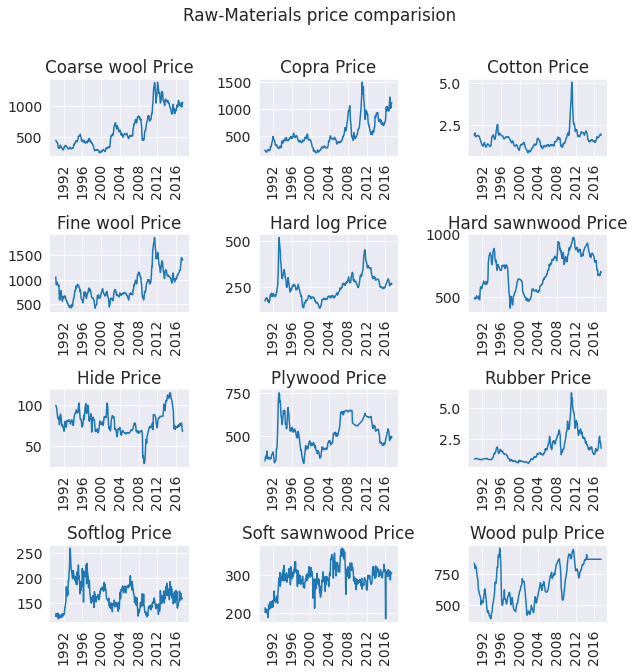

In [31]:
plt.figure(figsize=(10, 10))
materialslist=['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
            'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
for i in range(len(materialslist)):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.title(materialslist[i])
  plt.plot(df[materialslist[i]])
  plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

Podemos ver que o algodão e a borracha são os preços mais baixos.

**Vamos comparar preços para entender melhor qual é o mais baixo**

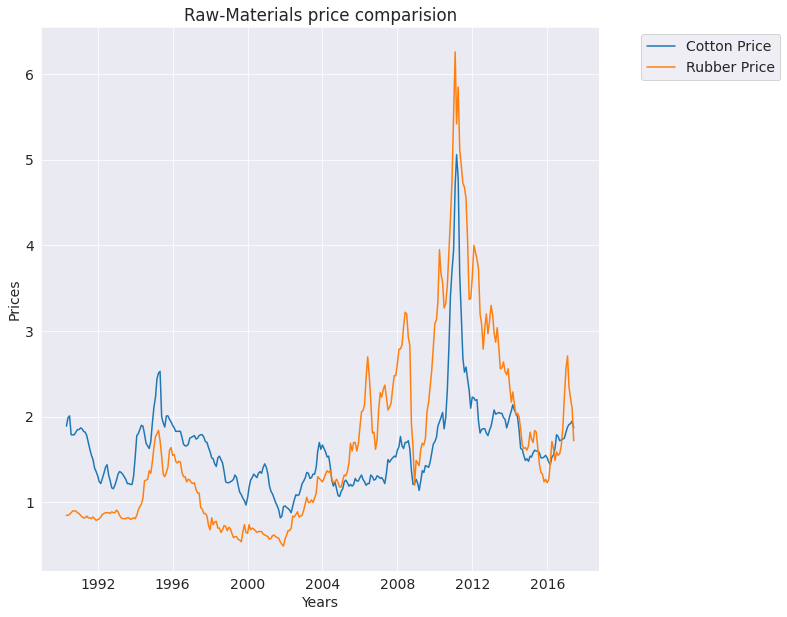

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2, 1))

**Algodão** é a matéria-prima de menor preço nos últimos anos

**Q3: Qual matéria-prima tem a maior e menor variação de % de preço?**

In [33]:
import random as random

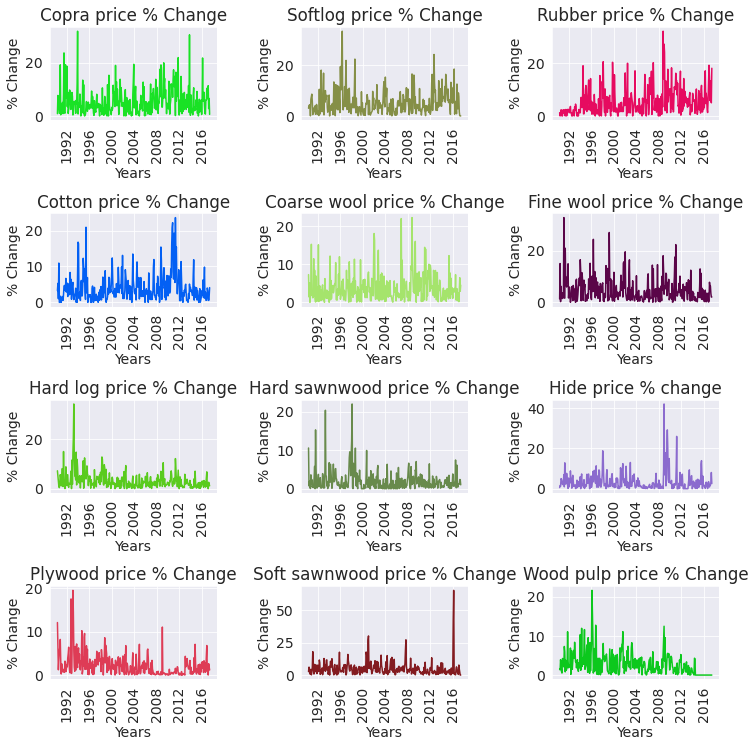

In [34]:
plt.figure(figsize=(12, 12))
for i in range(len(changelist)):
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.plot(df[changelist[i]], c=color)
  plt.xticks(rotation=90)
  plt.title(changelist[i])
  plt.xlabel('Years')
  plt.ylabel('% Change')

Podemos ver a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

**Q4: Encontre as matérias-primas com mudança drástica de preço**

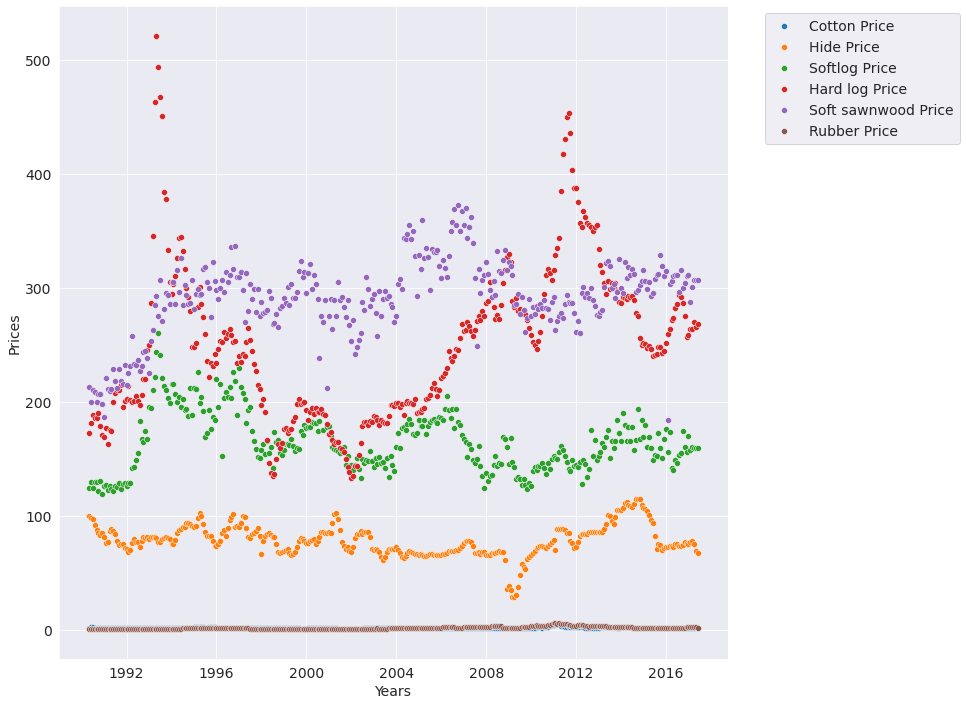

In [35]:
lowlist=['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
plt.figure(figsize=(12, 12))
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(lowlist)):
  sns.scatterplot(y=df[lowlist[i]], x=df.index);
  plt.legend(lowlist, loc='upper center', bbox_to_anchor=(1.2,1))

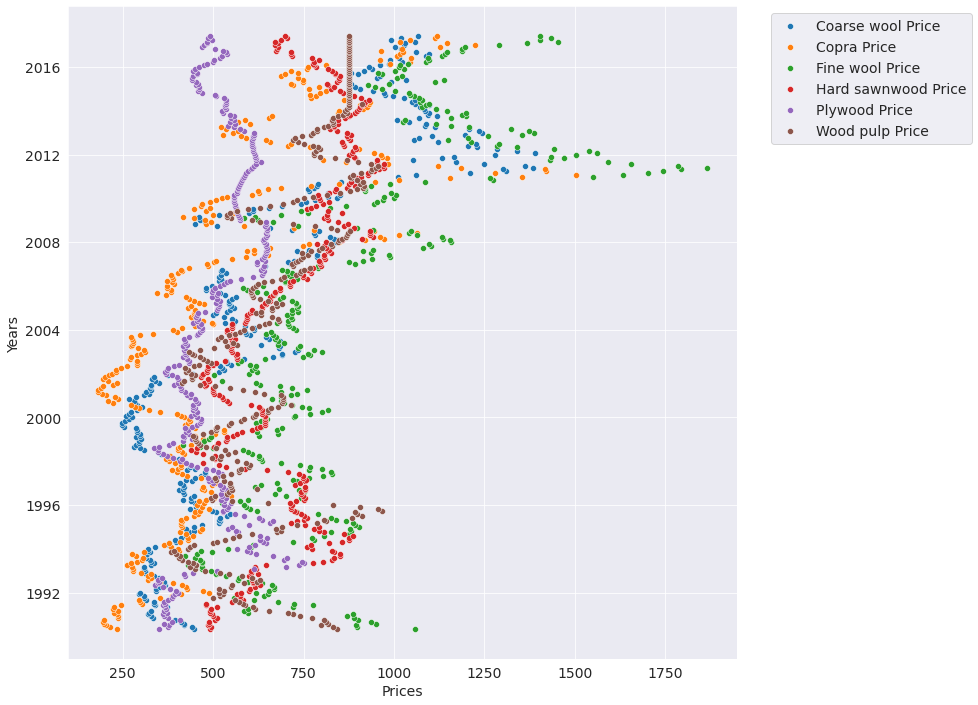

In [36]:
highlist = ['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard sawnwood Price', 'Plywood Price', 'Wood pulp Price']
plt.figure(figsize=(12, 12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
  sns.scatterplot(x=df[highlist[i]], y=df.index);
  plt.legend(highlist, loc='upper center', bbox_to_anchor=(1.2, 1))

A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina

**Q5: Descobrir a faixa de preço de matérias-primas de baixo preço**

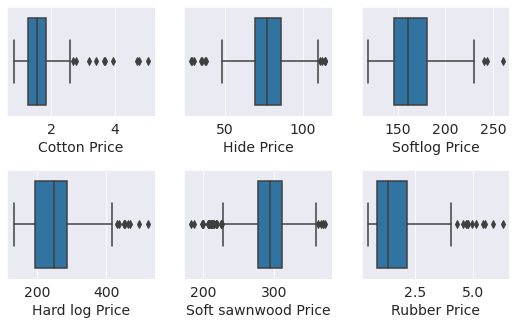

In [37]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.boxplot(x=df[lowlist[i]])

Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil(Q3) e máximo e outliers

# Inferências e Conclusão




*   Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços
*   Alta e baixa % de variações dos materiais
*   Pudemos identificar a variação de preços ao longo dos anos
*   Correlação entre eles usando um mapa de calor

# Trabalho futuro


*   Além disso, poderiamos descobrir a relação entre as matéria-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*   Também pudemos prever os preços das matérias-primas analisando os anos anteriores
*   Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o pr´roximo ano e descobrir quaisquer materiais alternativos.







